In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


$$E(2\bar{X}) = 2E(\bar(X)) = 2E({{\sum x_i} \over n}) = {2 \over n}E({\sum x_i}) = {2 \over n}{\sum E(x_i)} = {2 \over n}{\sum {b \over 2}}
$$
$$ = {2bn \over 2n} = b
$$

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

C:\Users\C20Eric.Hembling\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


5.259739233093787

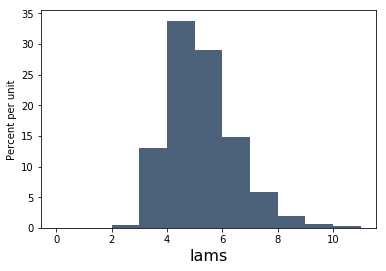

In [9]:
lambda_estimates = make_array()
for i in np.arange(100000):
    lambda_estimates = np.append(lambda_estimates, 1/np.mean(stats.expon.rvs(scale = 1/5,size=20)))
    
Table().with_column('lams',lambda_estimates).hist(bins = np.arange(12))
np.mean(lambda_estimates)

For 100,000 samples of size 20 generated from a $\lambda$ of 5, our estimator ${1 \over \bar{X}} \approx 5.26$. As it is not on average equal to $\lambda$, it is a biased estimator.

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

If $\hat{\mu}_{MoM}$ is consistent, then
$$\underset{n \to \infty}{\lim} Var(\hat{\mu}_{MoM})=0$$
and
$$\underset{n \to \infty}{\lim} Var(2\bar{X})=0$$
The variance of $\hat{\mu}_{MoM}$ is:
$$ Var(2\bar{X}) = 4Var(\bar{X}) = 4Var({{\sum X_i} \over n}) = {4 \over n^2}Var({\sum X_i}) 
$$
$$ = {4 \over n^2}{\sum Var(X_i)} = {4 \over n^2}{\sum {b^2 \over 12}} = {4nb^2 \over 12n^2} = {b^2 \over 3n}
$$
Thus,

$$ \underset{n \to \infty}{\lim} Var(\hat{\mu}_{MoM})= \underset{n \to \infty}{\lim} {b^2 \over 3n}  = 0
$$
Therefore, $\hat{\mu}_{MoM}$ is consistent. Below a simulation with a population b of 5 demonstrates this.

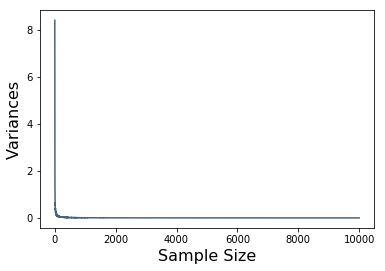

In [4]:
a = 0
b = 5
varslog = make_array()
for i in np.arange(1,10001):
    sample_estimates = make_array()
    for n in np.arange(100):
        sample_estimates = np.append(sample_estimates,2*np.mean(stats.uniform.rvs(loc = a, scale = b,size = i)))
    varslog = np.append(varslog,np.var(sample_estimates))
    
Table().with_column('Sample Size',np.arange(1,10001)).with_column('Variances',varslog).plot(0)

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

If $\hat{\mu}_{MoM}$ is consistent, then
$$\underset{n \to \infty}{\lim} Var(\hat{\mu}_{MoM})=0$$
and
$$\underset{n \to \infty}{\lim} Var(\bar{X})=0.$$
The variance of $\hat{\mu}_{MoM}$ is:
$$ Var(\bar{X}) = Var({{\sum X_i} \over n}) = {1 \over n^2}Var({\sum X_i}) 
$$
$$ = {1 \over n^2}{\sum Var(X_i)} = {1 \over n^2}{\sum \sigma^2} = {n\sigma^2 \over n^2} = {\sigma^2 \over n}
$$
Thus,

$$ \underset{n \to \infty}{\lim} Var(\hat{\mu}_{MoM})= \underset{n \to \infty}{\lim} {\sigma^2 \over n}  = 0
$$
Therefore, $\hat{\mu}_{MoM}$ is consistent. Below a simulation with a population $\mu$ of 5 demonstrates this.

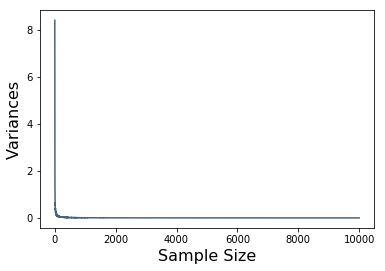

In [10]:
mu = 5
varslog1 = make_array()
for i in np.arange(1,10001):
    sample_estimates1 = make_array()
    for n in np.arange(100):
        sample_estimates1 = np.append(sample_estimates1,np.mean(stats.norm.rvs(loc = mu,size = i)))
    varslog1 = np.append(varslog1,np.var(sample_estimates1))
    
Table().with_column('Sample Size',np.arange(1,10001)).with_column('Variances',varslog).plot(0)

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

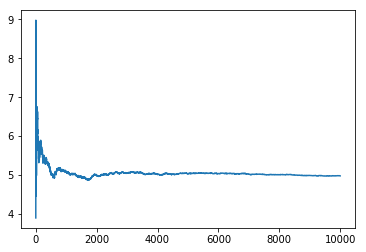

In [6]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()

Documentation: I discussed the analytical solutions to Examples 3 and 4, but solved them on my own.